In [75]:
import pandas as pd
#from binance.spot import Spot as Client
from binance.client import Client
import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import ta

In [76]:
import algo.research

In [77]:
import importlib, data.read
importlib.reload(data.read)
importlib.reload(algo.research)

<module 'algo.research' from '/home/junlim/projects/kristjan_swing/algo/research.py'>

In [78]:
df_all = data.read.df_okx_20231220_1225
#df_all = data.read.df_okx_20231222_1222
#df_all = data.read.df_okx_20231201_1227

### backtest algo

In [79]:
importlib.reload(algo.research)

<module 'algo.research' from '/home/junlim/projects/kristjan_swing/algo/research.py'>

In [80]:
def strategy_backtest(data, portfolio_value, risk_trade_percentage, min_days_in_consolidation, max_days_in_consolidation, min_perc_increase):
    trades = pd.DataFrame(columns=['Asset', 'Entry Date', 'Exit Date', 'Entry Price', 'Exit Price', 'Dollar Return', 'Outcome'])
    open_trades = pd.DataFrame(columns=['Asset', 'Entry Date', 'Entry Price', 'Current Price', 'Stop Loss', 'Potential Dollar Return'])
    for asset, df in data.items():
        df, new_trades, new_open_trades = algo.research.trade_asset(asset, df, float(portfolio_value / len(data)), risk_trade_percentage, min_days_in_consolidation, max_days_in_consolidation, min_perc_increase)
        trades = pd.concat([trades, new_trades], ignore_index=True)
        open_trades = pd.concat([open_trades, new_open_trades], ignore_index=True)

    return trades, open_trades

In [81]:
def describe_backtest(data_dict, trades, open_trades, portfolio_value, show_legend=False):
    # Sort trades DataFrame by 'Entry Date'
    trades.sort_values(by='Entry Date', inplace=True)
    # Create a figure for individual portfolio plots
    plt.figure(figsize=(12, 8))
    
    # Configure the individual portfolio plot
    plt.title('Individual Portfolio Performance by Asset')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value')
    
    # Initialize a DataFrame to store aligned portfolio values for all assets
    all_portfolios = pd.DataFrame()
    
    # Plot portfolio value for each asset and align for average	calculation
    for asset, df in data_dict.items():
        if df['portfolio'].iloc[-1] == df['portfolio'].iloc[0]:
            continue
        plt.plot(df['date'], df['portfolio'], label=f'{asset}')
        all_portfolios[asset] = df.set_index('date')['portfolio'] - portfolio_value
    #all_portfolios.fillna(float(portfolio_value / len(data_dict)), inplace=True)
    all_portfolios.fillna(method='ffill', inplace=True)

    if show_legend:
        plt.legend()
    plt.grid(True)
    plt.show() # Show the plot for individual portfolios
    
    # Create a new figure for the average portfolio plot
    plt.figure(figsize=(12, 8))
    # Calculate the average portfolio value
    all_portfolios['Average Portfolio'] = all_portfolios.sum(axis=1)
    # Plot the average portfolio value
    plt.plot(all_portfolios.index, all_portfolios['Average Portfolio'], label='Average Portfolio', color='black', linewidth=2)
    
    # Configure the average portfolio plot
    plt.title('Average Portfolio Performance')
    plt.xlabel('Date')
    plt.ylabel('Average Portfolio Value')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return all_portfolios

### apply backtest to okx 1minutes data

In [82]:
importlib.reload(algo.research)

<module 'algo.research' from '/home/junlim/projects/kristjan_swing/algo/research.py'>

In [83]:
def strategy_backtest_from_df(df_all, position_size, risk_trade_percentage, min_days_in_consolidation, max_days_in_consolidation, min_perc_increase):
    trades = pd.DataFrame(columns=['Asset', 'Entry Date', 'Exit Date', 'Entry Price', 'Exit Price', 'Dollar Return', 'Outcome'])
    open_trades = pd.DataFrame(columns=['Asset', 'Entry Date', 'Entry Price', 'Current Price', 'Stop Loss', 'Potential Dollar Return'])
    data_dict = {}
    
    for asset, df in df_all.groupby('asset'):
        df, new_trades, new_open_trades = algo.research.trade_asset(asset, df.reset_index().drop('index', axis=1), position_size, risk_trade_percentage, min_days_in_consolidation, max_days_in_consolidation, min_perc_increase)
        data_dict[asset] = df
        trades = pd.concat([trades, new_trades], ignore_index=True)
        open_trades = pd.concat([open_trades, new_open_trades], ignore_index=True)

    return data_dict, trades, open_trades

In [84]:
# Initial value of the trading portfolio in dollars
portfolio_value = 100000
# Maximum percentage of the portfolio value to risk on a single trade
risk_trade_percentage = 1
# Minimum number of days for an asset to be considered in a consolidation period
min_days_in_consolidation = 7
# Maximum number of days for an asset to remain in the consolidation period
max_days_in_consolidation = 56
# Minimum percentage increase in asset price to consider for trading
min_perc_increase = 3

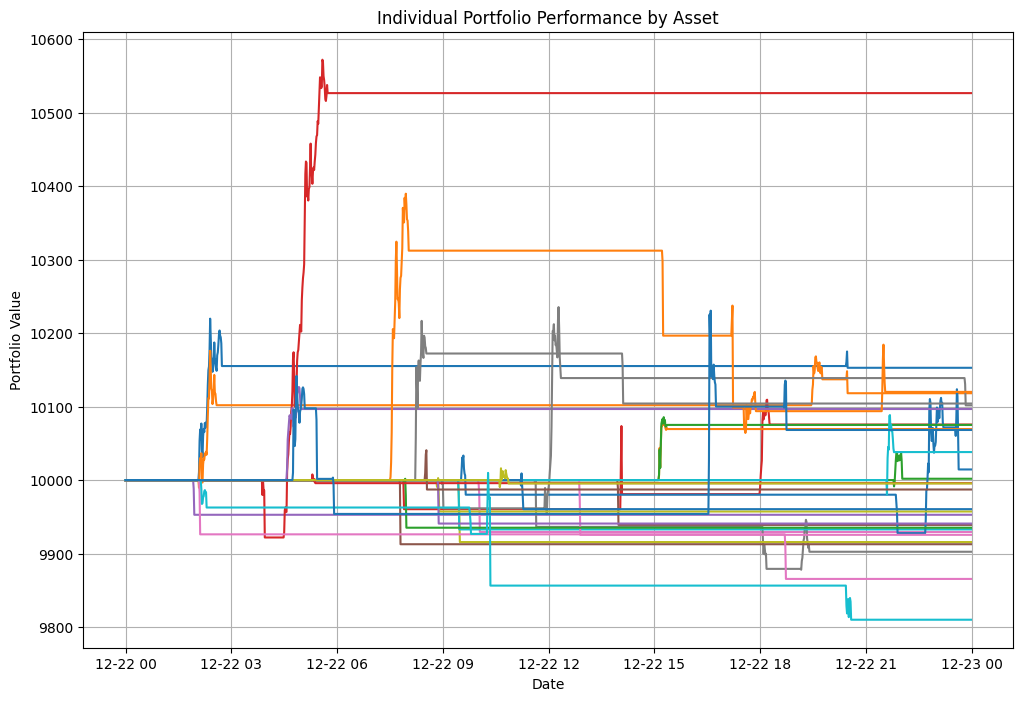

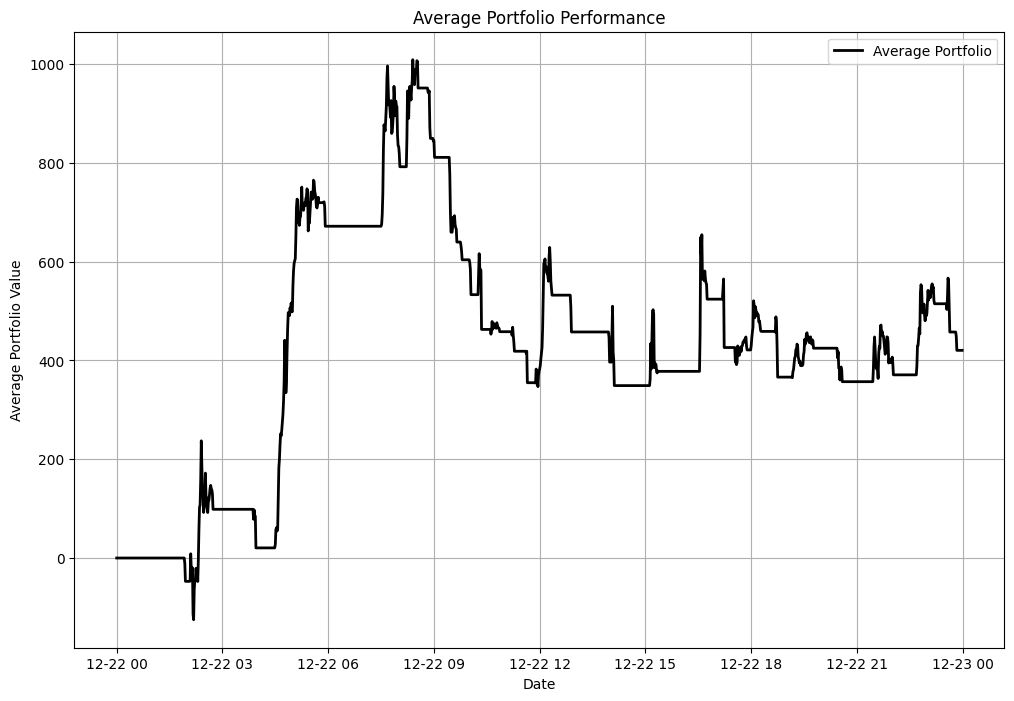

In [46]:
data_dict_3, closed_trades_3, open_trades_3 = strategy_backtest_from_df(data.read.df_okx_20231222_1222, int(portfolio_value / 10), risk_trade_percentage, min_days_in_consolidation, max_days_in_consolidation, 3)
all_portfolios_ = describe_backtest(data_dict_3, closed_trades_3, open_trades_3, float(portfolio_value / 10))

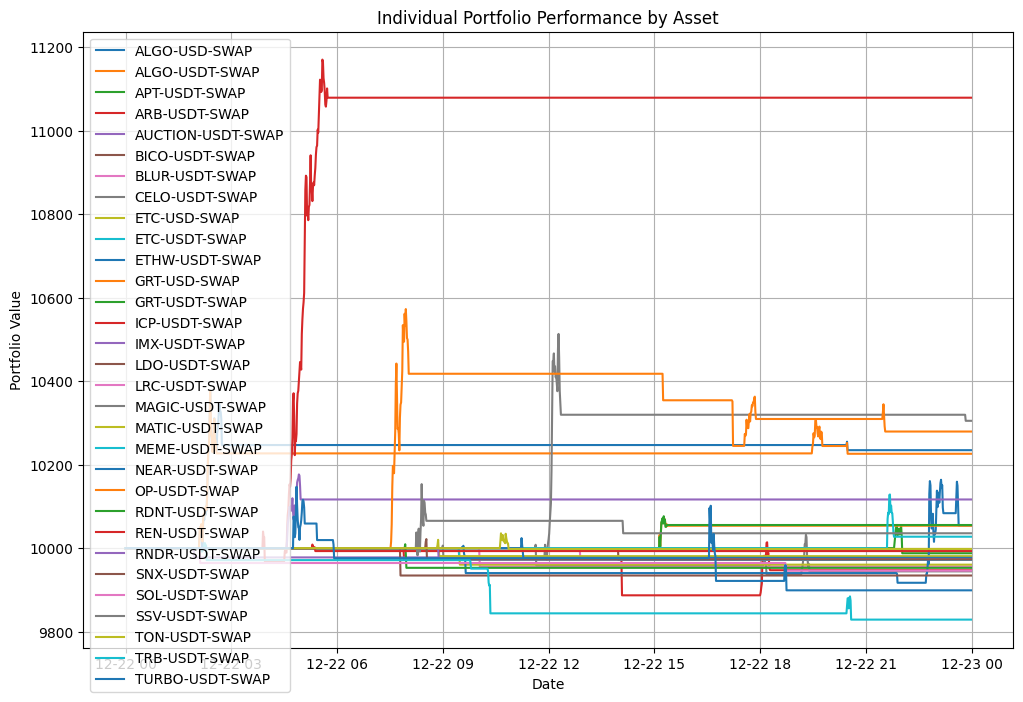

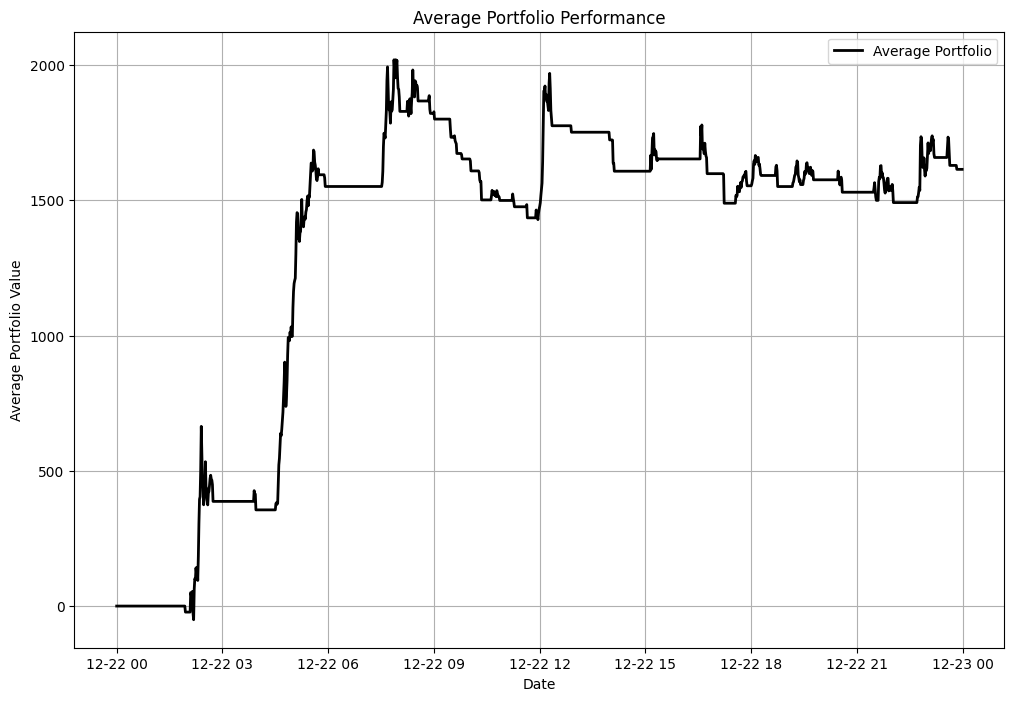

In [89]:
data_dict_3, closed_trades_3, open_trades_3 = strategy_backtest_from_df(data.read.df_okx_20231222_1222, int(portfolio_value / 10), risk_trade_percentage, min_days_in_consolidation, max_days_in_consolidation, 3)
all_portfolios_ = describe_backtest(data_dict_3, closed_trades_3, open_trades_3, float(portfolio_value / 10), show_legend=True)

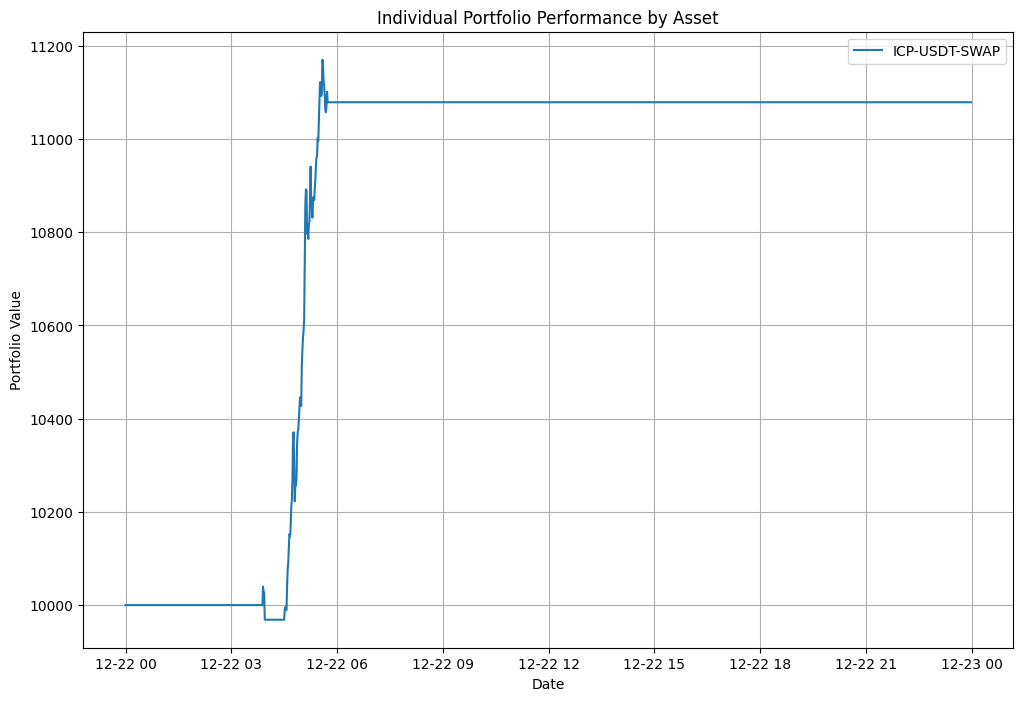

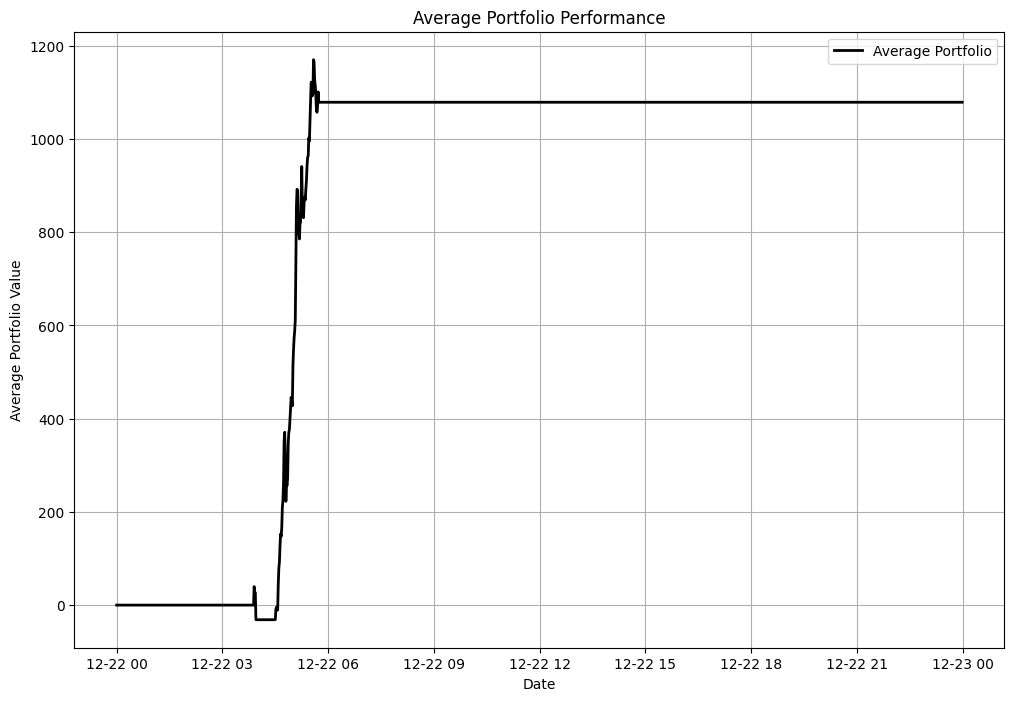

In [114]:
data_dict_3, closed_trades_3, open_trades_3 = strategy_backtest_from_df(data.read.df_okx_20231222_1222[data.read.df_okx_20231222_1222.asset == 'ICP-USDT-SWAP'], int(portfolio_value / 10), risk_trade_percentage, min_days_in_consolidation, max_days_in_consolidation, 3)
all_portfolios_ = describe_backtest(data_dict_3, closed_trades_3, open_trades_3, float(portfolio_value / 10), show_legend=True)

In [110]:
dfi = data.read.df_okx_20231222_1222[data.read.df_okx_20231222_1222.asset == 'ICP-USDT-SWAP'].reset_index(drop=True)

In [115]:
closed_trades_3

,Asset,Entry Date,Exit Date,Entry Price,Exit Price,Dollar Return,Outcome
0,ICP-USDT-SWAP,2023-12-22 03:53:00,2023-12-22 03:57:00,9.470718,9.44700,-31.378772,Stop Loss
1,ICP-USDT-SWAP,2023-12-22 04:30:00,2023-12-22 05:45:00,9.772983,10.82455,1072.617825,Trail


In [116]:
open_trades_3

,Asset,Entry Date,Entry Price,Current Price,Stop Loss,Potential Dollar Return


In [118]:
data_dict_3['ICP-USDT-SWAP']

,date,asset,open,high,low,close,volume,highest_high,increase_30_bars,increase_60_bars,...,portfolio,position_halved,SMA_10,SMA_20,SMA_50,sma_valid,transported_gain_loss,ATR,outcome,stop_loss
0,2023-12-22 00:00:00,ICP-USDT-SWAP,9.170143,9.188,9.167,9.175286,18816.61,False,0.0,0.0,...,10000.000000,False,NaN,NaN,NaN,False,0.0,0.000000,None,NaN
1,2023-12-22 00:10:00,ICP-USDT-SWAP,9.125000,9.138,9.105,9.129250,19948.62,False,0.0,0.0,...,10000.000000,False,NaN,NaN,NaN,False,0.0,0.000000,None,NaN
2,2023-12-22 00:11:00,ICP-USDT-SWAP,9.130000,9.149,9.126,9.139296,62945.55,False,0.0,0.0,...,10000.000000,False,NaN,NaN,NaN,False,0.0,0.000000,None,NaN
3,2023-12-22 00:12:00,ICP-USDT-SWAP,9.137958,9.140,9.112,9.123208,18656.28,False,0.0,0.0,...,10000.000000,False,NaN,NaN,NaN,False,0.0,0.000000,None,NaN
4,2023-12-22 00:13:00,ICP-USDT-SWAP,9.119941,9.128,9.109,9.118647,20453.52,False,0.0,0.0,...,10000.000000,False,NaN,NaN,NaN,False,0.0,0.000000,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,2023-12-22 23:55:00,ICP-USDT-SWAP,9.317962,9.330,9.315,9.322692,30602.36,False,0.0,0.0,...,11078.826727,False,9.300796,9.298319,9.347728,False,0.0,0.021005,None,NaN
1427,2023-12-22 23:56:00,ICP-USDT-SWAP,9.329000,9.344,9.325,9.333947,23443.13,False,0.0,0.0,...,11078.826727,False,9.304233,9.299321,9.346001,False,0.0,0.021027,None,NaN
1428,2023-12-22 23:57:00,ICP-USDT-SWAP,9.343000,9.347,9.337,9.341148,29065.09,True,0.0,0.0,...,11078.826727,False,9.308858,9.301763,9.344433,False,0.0,0.020457,None,NaN
1429,2023-12-22 23:58:00,ICP-USDT-SWAP,9.341077,9.342,9.330,9.335385,41494.89,False,0.0,0.0,...,11078.826727,False,9.313492,9.303282,9.342856,False,0.0,0.019853,None,NaN


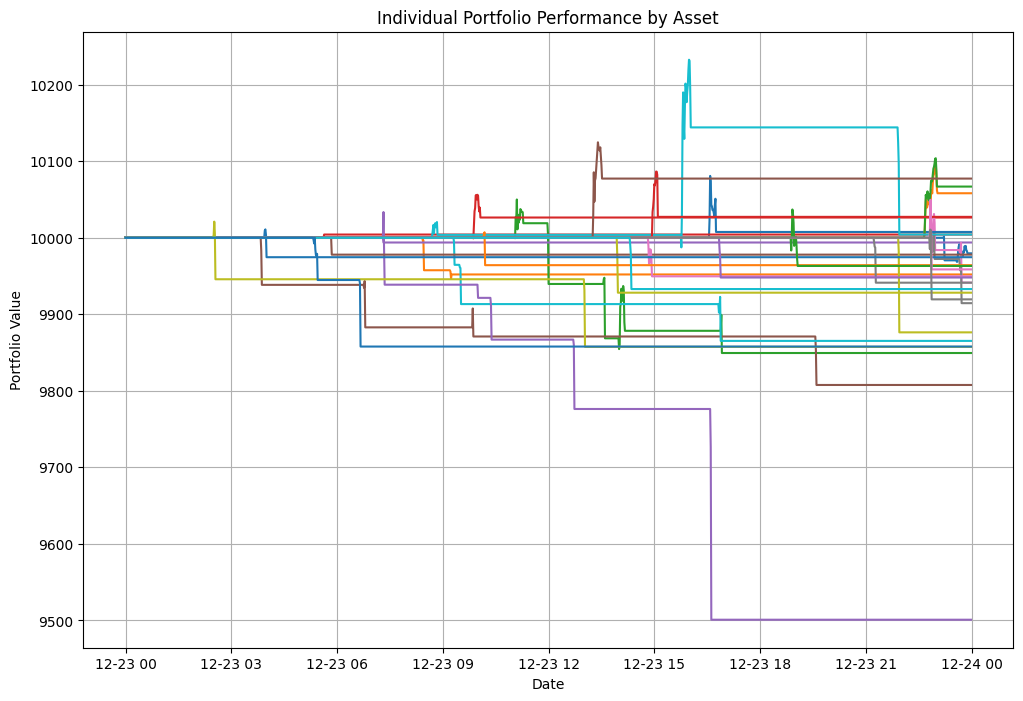

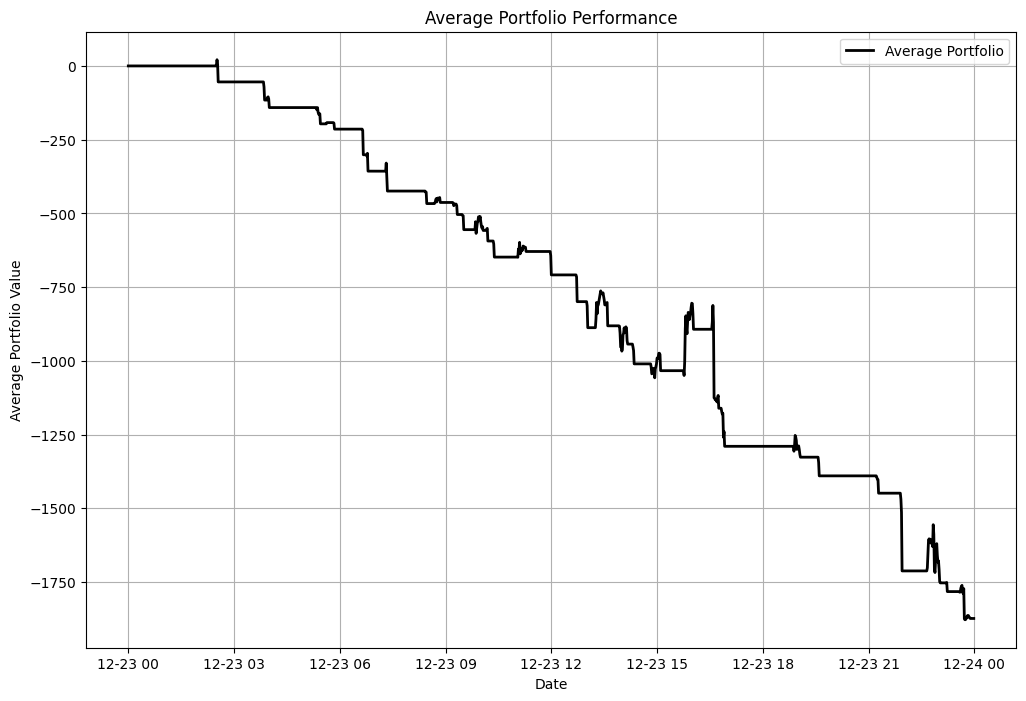

In [47]:
data_dict_3, closed_trades_3, open_trades_3 = strategy_backtest_from_df(data.read.df_okx_20231223_1223, int(portfolio_value / 10), risk_trade_percentage, min_days_in_consolidation, max_days_in_consolidation, 3)
all_portfolios_ = describe_backtest(data_dict_3, closed_trades_3, open_trades_3, float(portfolio_value / 10))

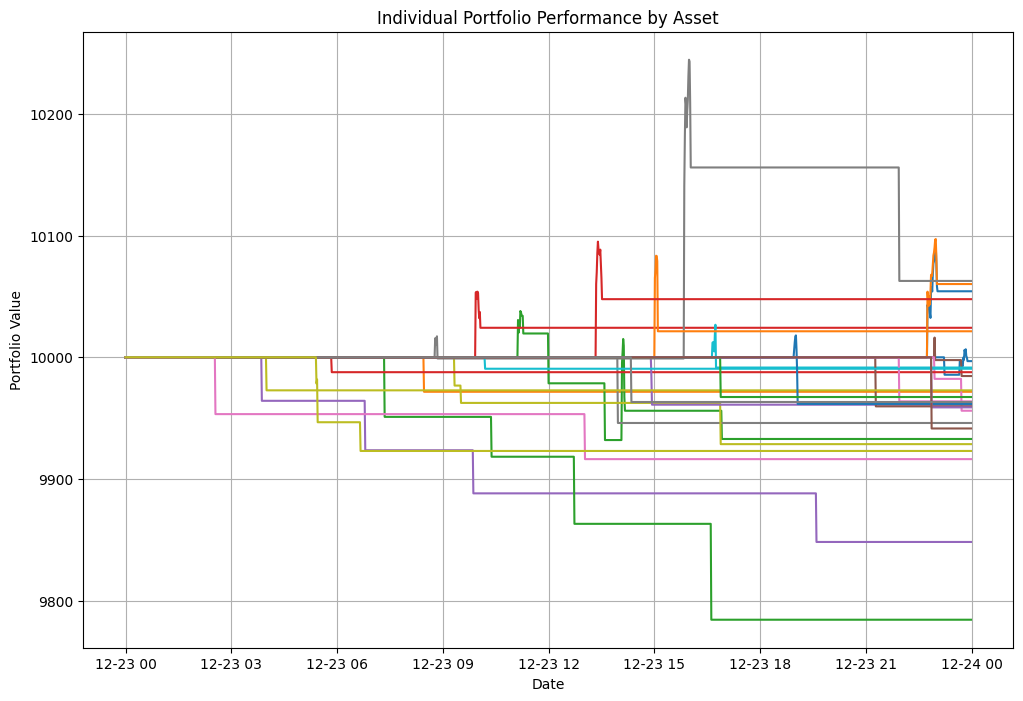

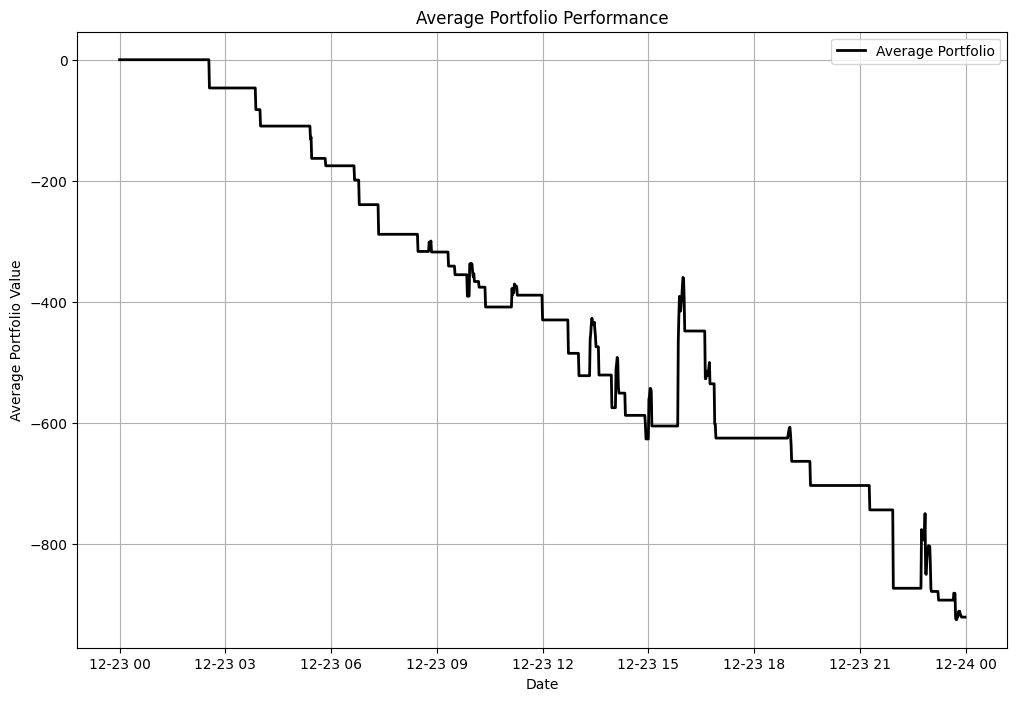

In [20]:
data_dict_3, closed_trades_3, open_trades_3 = strategy_backtest_from_df(data.read.df_okx_20231223_1223, int(portfolio_value / 10), risk_trade_percentage, min_days_in_consolidation, max_days_in_consolidation, 3)
all_portfolios_ = describe_backtest(data_dict_3, closed_trades_3, open_trades_3, float(portfolio_value / 10))

/tmp/ipykernel_9101/4111031620.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_portfolios[asset] = df.set_index('date')['portfolio'] - portfolio_value
/tmp/ipykernel_9101/4111031620.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_portfolios[asset] = df.set_index('date')['portfolio'] - portfolio_value
/tmp/ipykernel_9101/4111031620.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

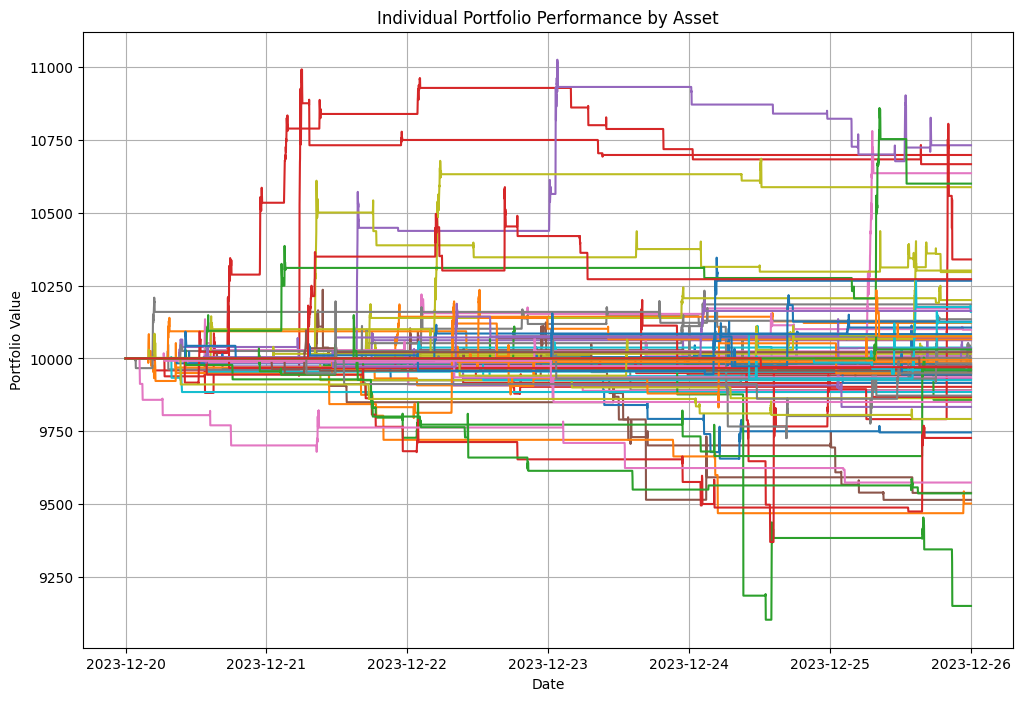

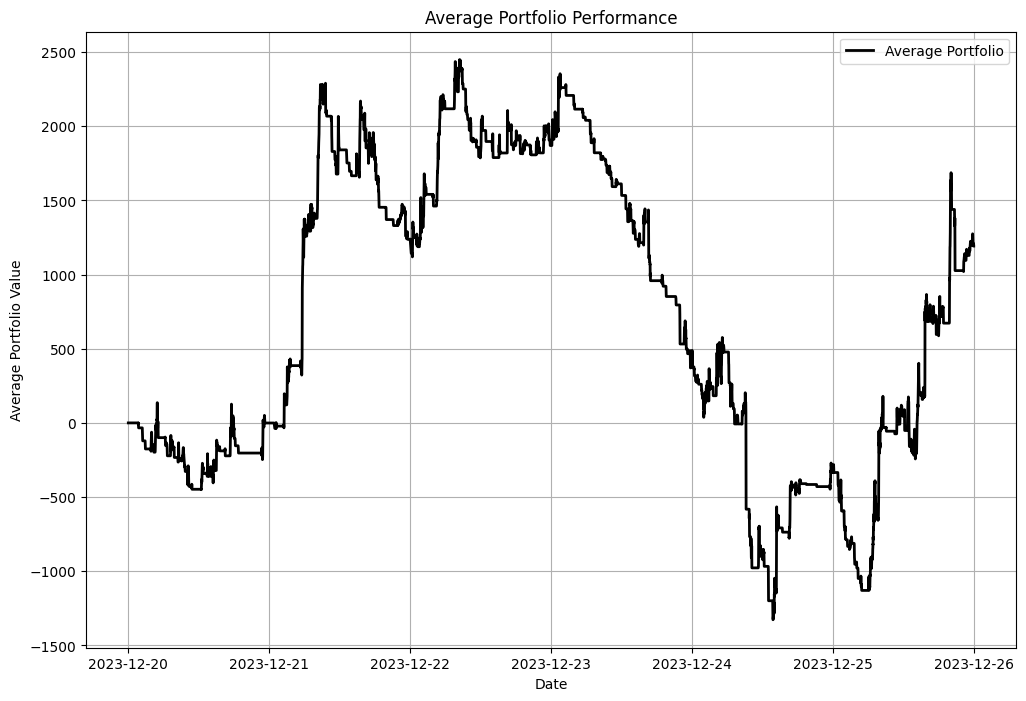

In [48]:
data_dict_3, closed_trades_3, open_trades_3 = strategy_backtest_from_df(data.read.df_okx_20231220_1225, int(portfolio_value / 10), risk_trade_percentage, min_days_in_consolidation, max_days_in_consolidation, 3)
all_portfolios_ = describe_backtest(data_dict_3, closed_trades_3, open_trades_3, float(portfolio_value / 10))

/tmp/ipykernel_9101/4111031620.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_portfolios[asset] = df.set_index('date')['portfolio'] - portfolio_value
/tmp/ipykernel_9101/4111031620.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_portfolios[asset] = df.set_index('date')['portfolio'] - portfolio_value
/tmp/ipykernel_9101/4111031620.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

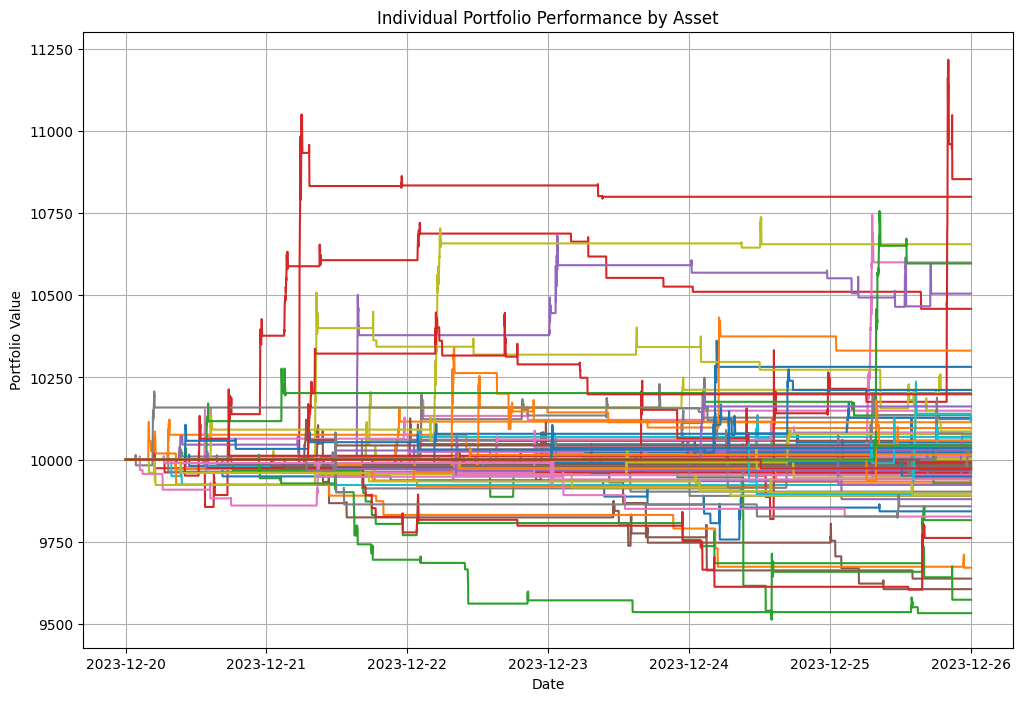

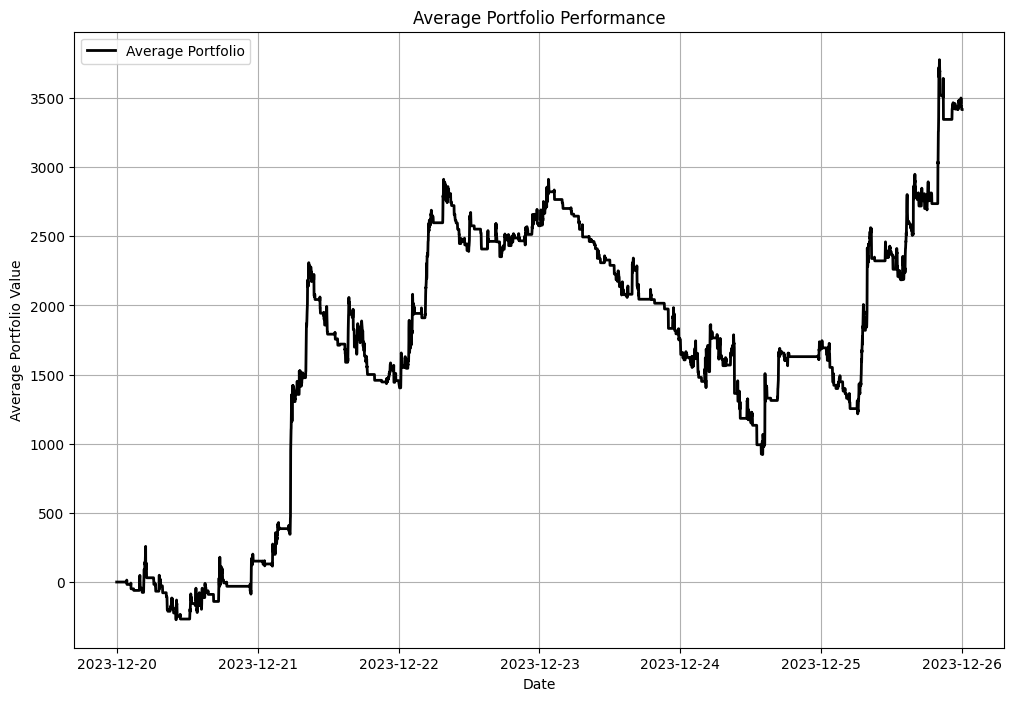

In [72]:
data_dict_3, closed_trades_3, open_trades_3 = strategy_backtest_from_df(data.read.df_okx_20231220_1225, int(portfolio_value / 10), risk_trade_percentage, min_days_in_consolidation, max_days_in_consolidation, 3)
all_portfolios_ = describe_backtest(data_dict_3, closed_trades_3, open_trades_3, float(portfolio_value / 10))

/tmp/ipykernel_9101/4111031620.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_portfolios[asset] = df.set_index('date')['portfolio'] - portfolio_value
/tmp/ipykernel_9101/4111031620.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_portfolios[asset] = df.set_index('date')['portfolio'] - portfolio_value
/tmp/ipykernel_9101/4111031620.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

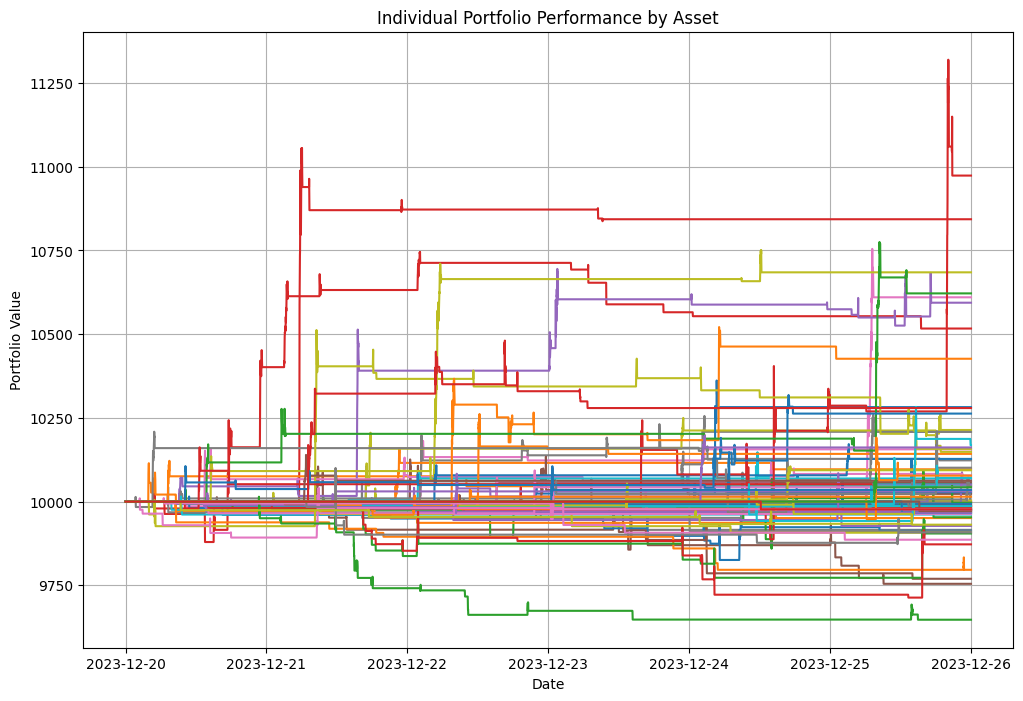

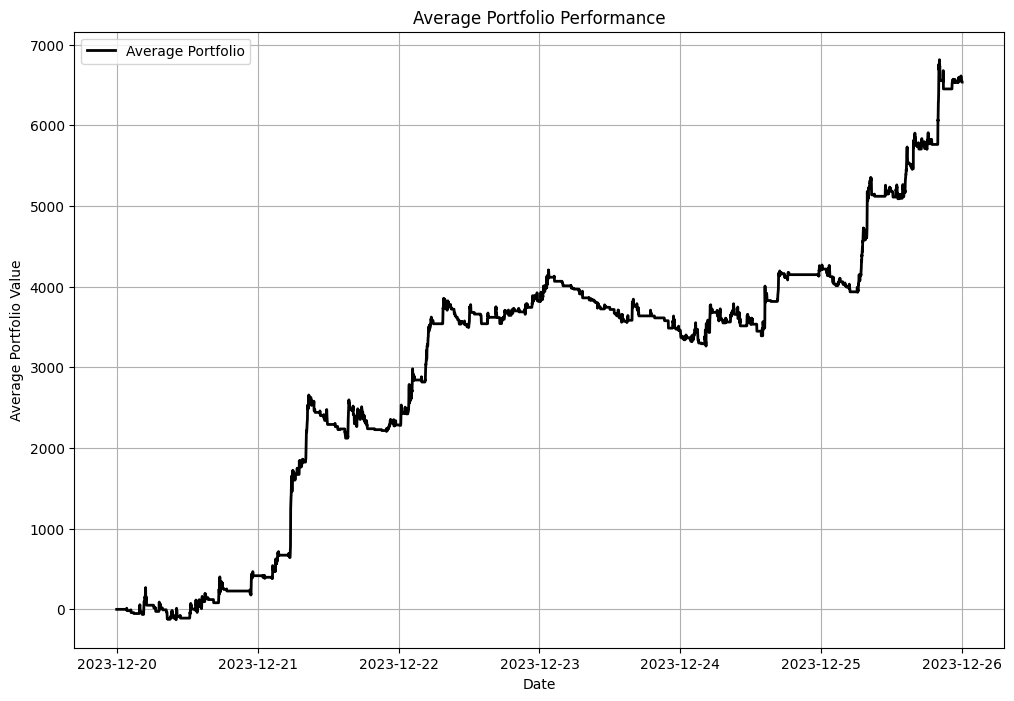

In [68]:
data_dict_3, closed_trades_3, open_trades_3 = strategy_backtest_from_df(data.read.df_okx_20231220_1225, int(portfolio_value / 10), risk_trade_percentage, min_days_in_consolidation, max_days_in_consolidation, 3)
all_portfolios_ = describe_backtest(data_dict_3, closed_trades_3, open_trades_3, float(portfolio_value / 10))

/tmp/ipykernel_9101/4111031620.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_portfolios[asset] = df.set_index('date')['portfolio'] - portfolio_value
/tmp/ipykernel_9101/4111031620.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_portfolios[asset] = df.set_index('date')['portfolio'] - portfolio_value
/tmp/ipykernel_9101/4111031620.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

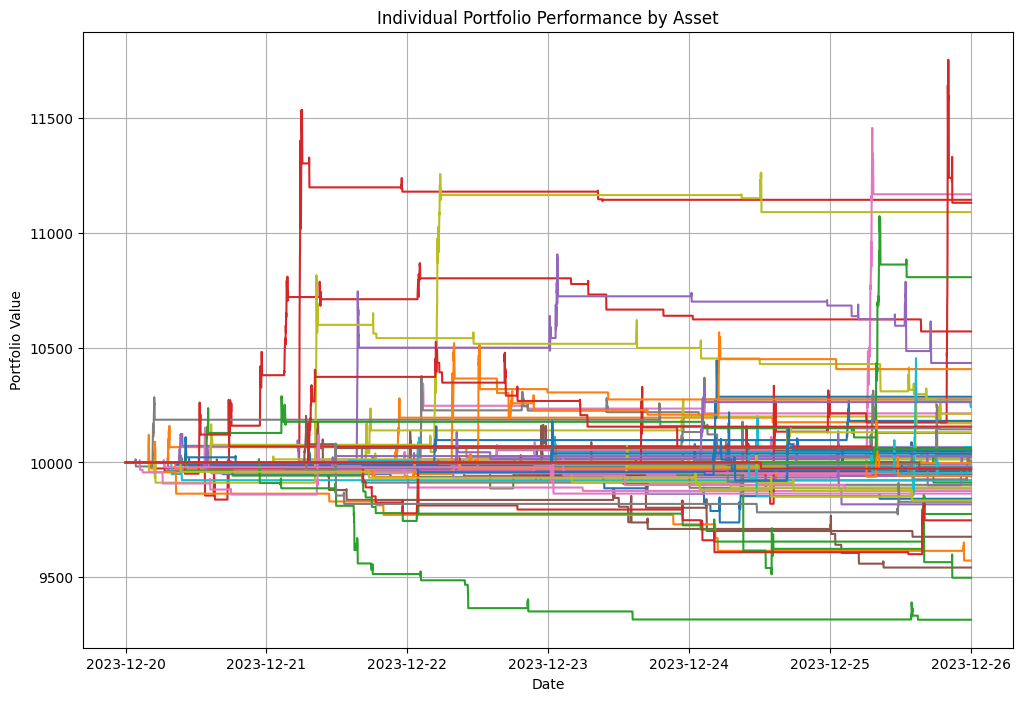

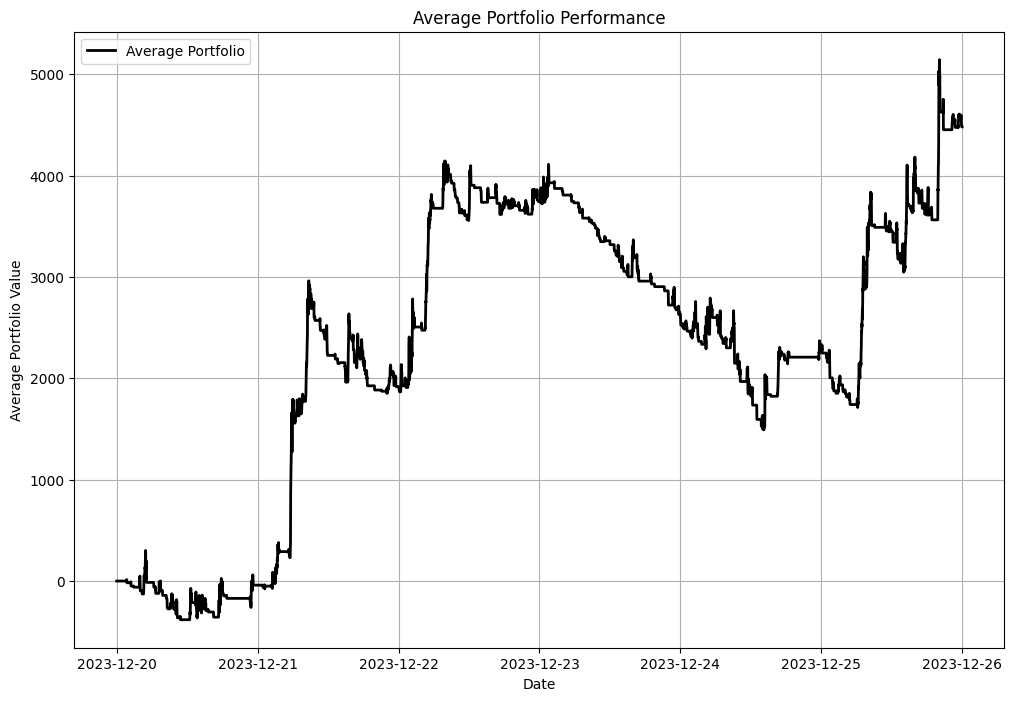

In [85]:
data_dict_3, closed_trades_3, open_trades_3 = strategy_backtest_from_df(data.read.df_okx_20231220_1225, int(portfolio_value / 10), risk_trade_percentage, min_days_in_consolidation, max_days_in_consolidation, 3)
all_portfolios_ = describe_backtest(data_dict_3, closed_trades_3, open_trades_3, float(portfolio_value / 10))

/tmp/ipykernel_9101/4111031620.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_portfolios[asset] = df.set_index('date')['portfolio'] - portfolio_value
/tmp/ipykernel_9101/4111031620.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_portfolios[asset] = df.set_index('date')['portfolio'] - portfolio_value
/tmp/ipykernel_9101/4111031620.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

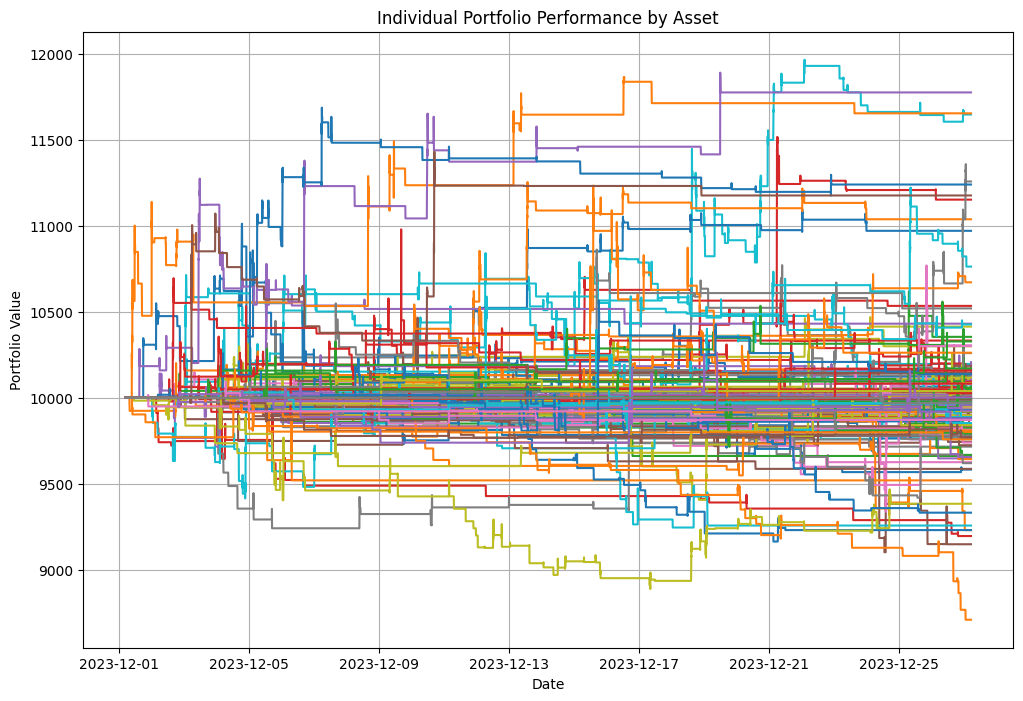

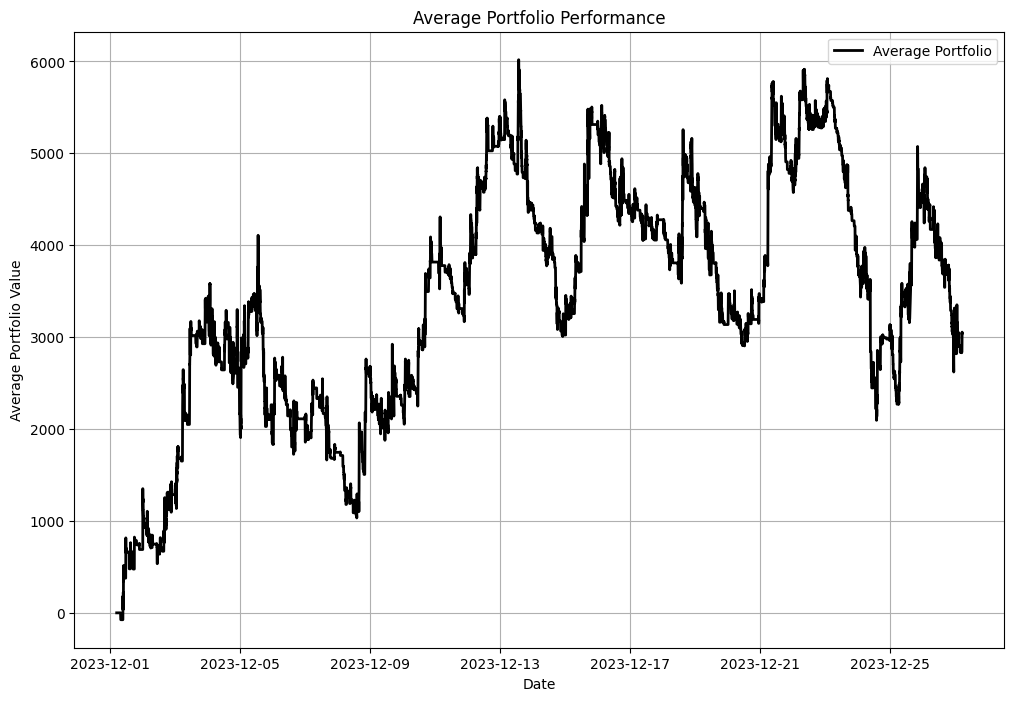

In [56]:
data_dict_3, closed_trades_3, open_trades_3 = strategy_backtest_from_df(data.read.df_okx_20231201_1227, int(portfolio_value / 10), risk_trade_percentage, min_days_in_consolidation, max_days_in_consolidation, 3)
all_portfolios_ = describe_backtest(data_dict_3, closed_trades_3, open_trades_3, float(portfolio_value / 10))

/tmp/ipykernel_9101/4111031620.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_portfolios[asset] = df.set_index('date')['portfolio'] - portfolio_value
/tmp/ipykernel_9101/4111031620.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_portfolios[asset] = df.set_index('date')['portfolio'] - portfolio_value
/tmp/ipykernel_9101/4111031620.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

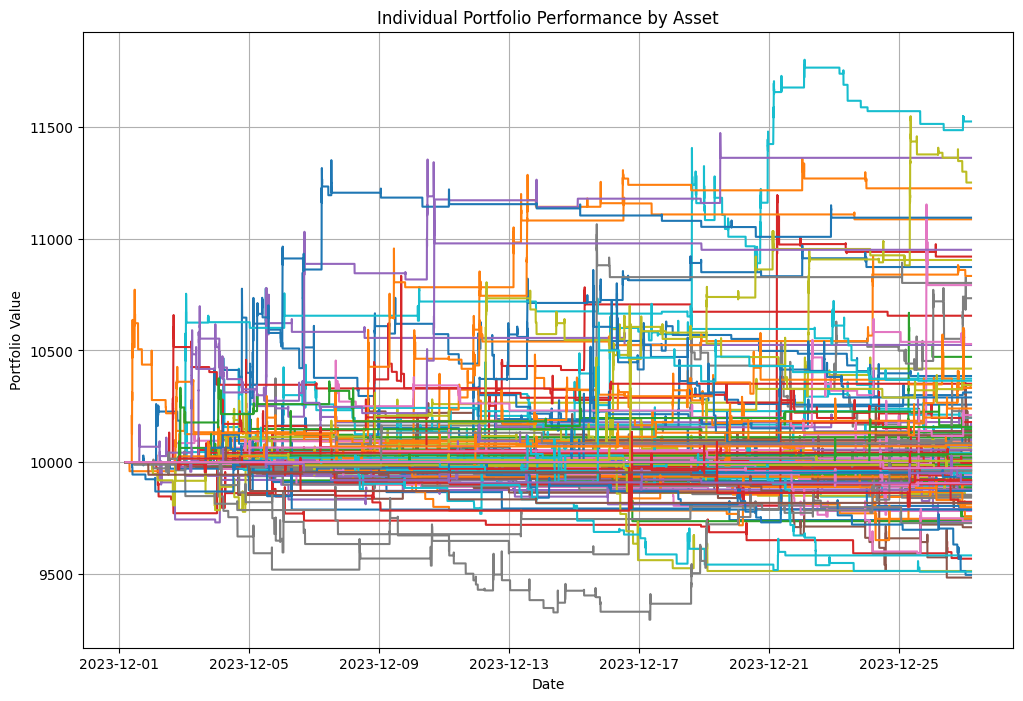

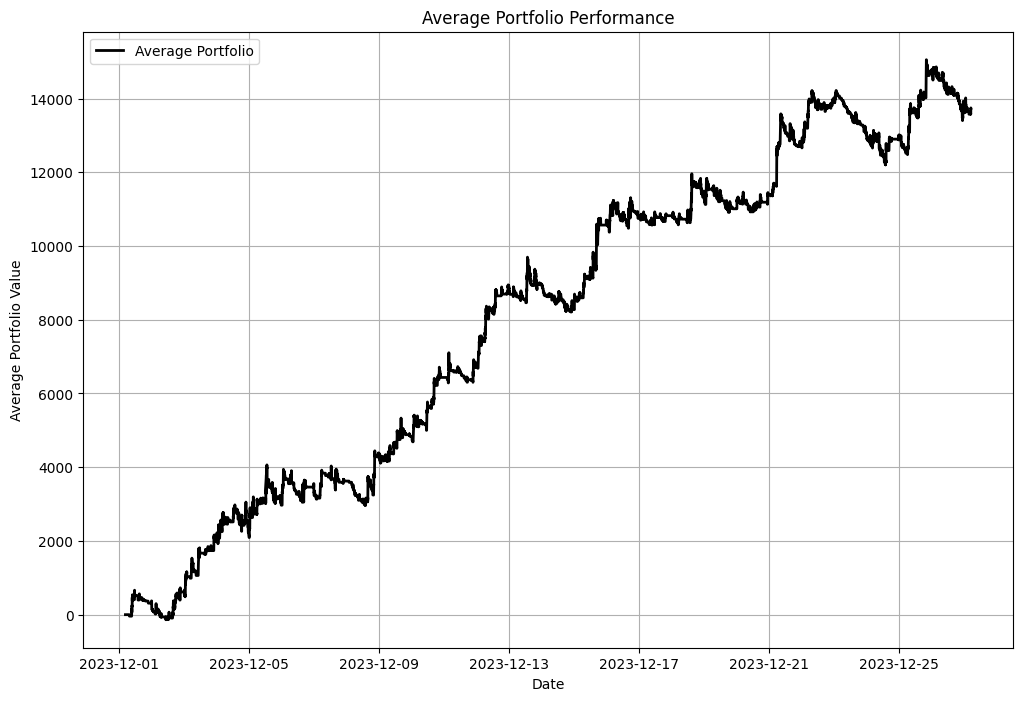

In [73]:
data_dict_3, closed_trades_3, open_trades_3 = strategy_backtest_from_df(data.read.df_okx_20231201_1227, int(portfolio_value / 10), risk_trade_percentage, min_days_in_consolidation, max_days_in_consolidation, 3)
all_portfolios_ = describe_backtest(data_dict_3, closed_trades_3, open_trades_3, float(portfolio_value / 10))

/tmp/ipykernel_9101/4111031620.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_portfolios[asset] = df.set_index('date')['portfolio'] - portfolio_value
/tmp/ipykernel_9101/4111031620.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_portfolios[asset] = df.set_index('date')['portfolio'] - portfolio_value
/tmp/ipykernel_9101/4111031620.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

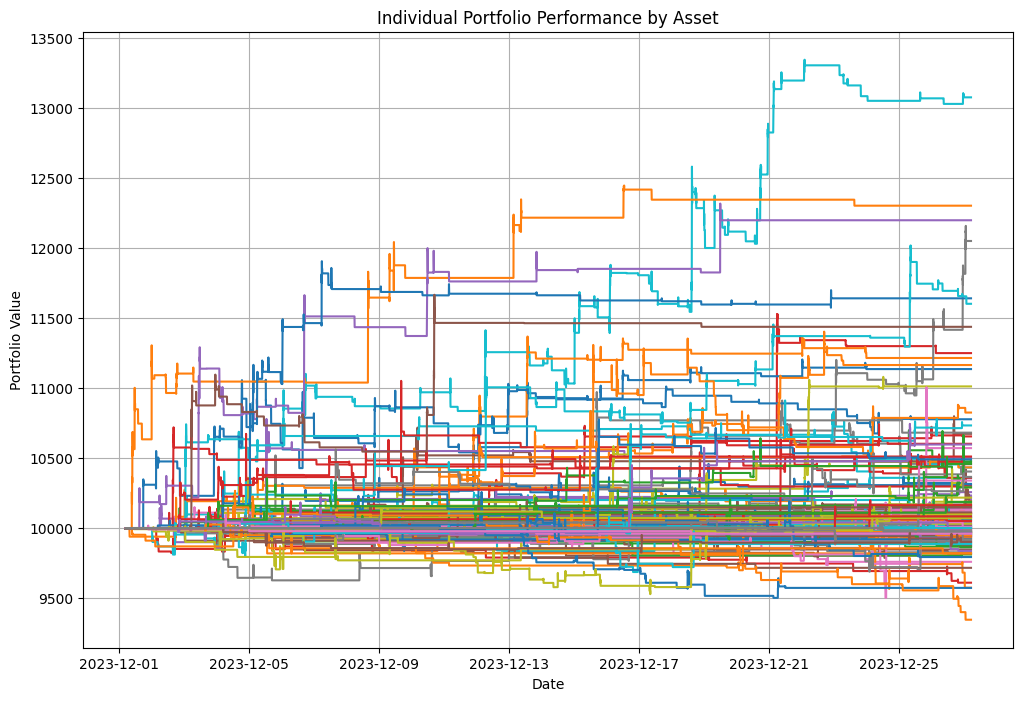

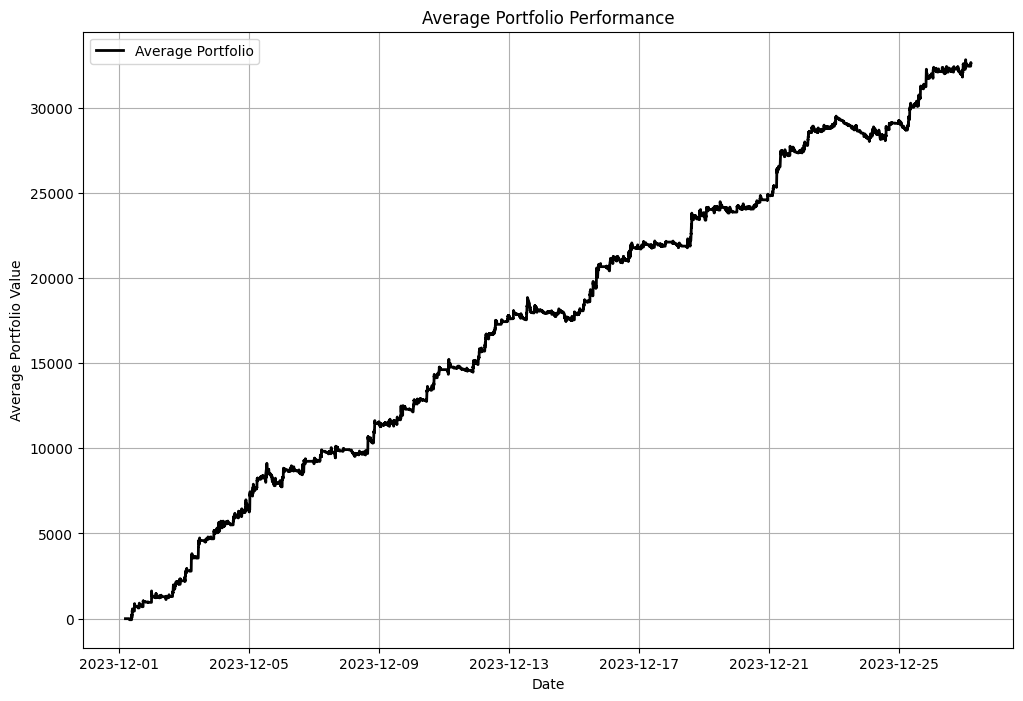

In [40]:
data_dict_3, closed_trades_3, open_trades_3 = strategy_backtest_from_df(data.read.df_okx_20231201_1227, int(portfolio_value / 10), risk_trade_percentage, min_days_in_consolidation, max_days_in_consolidation, 3)
all_portfolios_ = describe_backtest(data_dict_3, closed_trades_3, open_trades_3, float(portfolio_value / 10))